### Ecole Polytechnique, 2020-2021, MAP361P

Contact: arvind.singh@math.u-psud.fr

# Etude d'un processus stochastique: la marche 2-excitée

Ce notebook contient un exercice facultatif qui a pour but de vous entrainer pour vos projets Python. Il sert en particulier deux objectifs:

**1.** Se familiariser avec la modélisation et la simulation de processus stochastiques plus compliqués que juste la simulation de v.a. i.i.d...

**2.** Observer l'influence des choix algorithmiques sur la vitesse d'exécution du code:  vous verrez que l'on peut facilement gagner un facteur 100 ou plus dans le temps de simulation lorsqu'on fait attention à exploiter  les capacités de numpy. 

**Tachez de ne pas regarder pas le corrigé avant d'avoir essayé d'implémenter vous même le code. C'est la meilleure manière de se familiariser avec Python/numpy...**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy.random as npr

On veut étudier qualitativement un processus stochastique $X = (X_n)_{n\geq 0}$ appelé *marche 2-excitée* et défini de la manière suivante:

1. Soit $p, q \in ]0,1[$ fixés (ce sont les paramètres du modèle). 
2. Soit $( (\xi_n, \psi_n), n \geq 0)$ une suite i.i.d de couples de variables aléatoires dont les marginales suivent des lois de Rademacher sur $\{-1, 1\}$:
\begin{eqnarray*}
\mathbb{P}(\xi_n = 1) &= p =& 1 -\mathbb{P}(\xi_n = -1) \\
\mathbb{P}(\psi_n = 1) &= q =& 1 -\mathbb{P}(\psi_n = -1) 
\end{eqnarray*}
3. On pose $X_0 = 0$ et on définit par récurrence:
$$
X_{n+1} = X_n +
\begin{cases}
\xi_n & \hbox{ si } \# \{ i \in \{0,1,\ldots,n\},\, X_i = X_n \} \leq 2,\\
\psi_n & \hbox{ sinon }
\end{cases}
$$

En mots, $X$ est une marche au plus proche voisin qui se comporte comme une marche classique biaisée de biais $p$ lorsqu'elle est en un site qu'elle n'a pas visité plus d'une fois et qui se comporte comme une marche biaisé de biais $q$ lorsqu'elle est en un site qu'elle a déjà visité au moins 2 fois.

Remarquons que la corrélation entre $\xi_n$ et $\psi_n$ n'a pas été précisée dans 2. car elle n'influe pas  dans la définition de la marche $X$ puisque, de toute facon, une seule de ces deux v.a. est utilisée.

###  Un peu de théorie...

**T1.** Que pouvez vous dire du processus $X$ Lorsque $p = q$. Identifier dans ce cas $\lim_{n\to\infty} X_n$ ? 

Le processus se réduit à une marche aléatoire classique biaisée de biais $p=q$. 

**T2.** Lorsque $p - 1/2$ et $q - 1/2$  sont tous deux non nuls et de même signe, que pouvez-vous dire de $\lim_{n\to\infty} X_n$ ? 
**Indication:** On pourra construire judicieusement les couples de v.a. $(\xi_n, \psi_n)$

### ...Avant de passer à la simulation

**S1.** Ecrire une fonction `excitedRW(p,q,N)` qui prend en paramètre $p,q,N$ et renvoie un tableau numpy d'entiers contenants les N premiers pas d'une réalisation de la marche $X$ avec paramètres $(p,q)$.

**Conseils.** On fera attention à l'implémentation de la fonction. Tachez de faire en sorte que le temps de simulation croisse linéairement avec le nombre de pas N. 

In [10]:
def excitedRW(p,q,N):
    xi = npr.choice([-1,1], N, p=[1-p, p])
    psi = npr.choice([-1,1], N, p=[1-q, q])
    
    X = np.zeros(N)
    valeurs = {0:1}
    for n in range(1,N):
        X[n] = X[n-1] + (xi[n] if valeurs[X[n-1]] <= 2 else psi[n])
        valeurs[X[n]] = 1 if X[n] not in valeurs.keys() else 1+valeurs[X[n]]
    
    return X

**S2.** Sur une même figure, affichez 4 sous-figures contenants chacune 5 réalisations de la marche excitée jusqu'au rang $1000$ pour les différentes valeurs des paramètres $(p,q) = (0.5,0.5) , (0.75, 0.5), (0.8, 0.6), (0.1, 0.55)$. Commentez ces graphiques, sont-il conformes aux prédictions ou à votre intuition ?

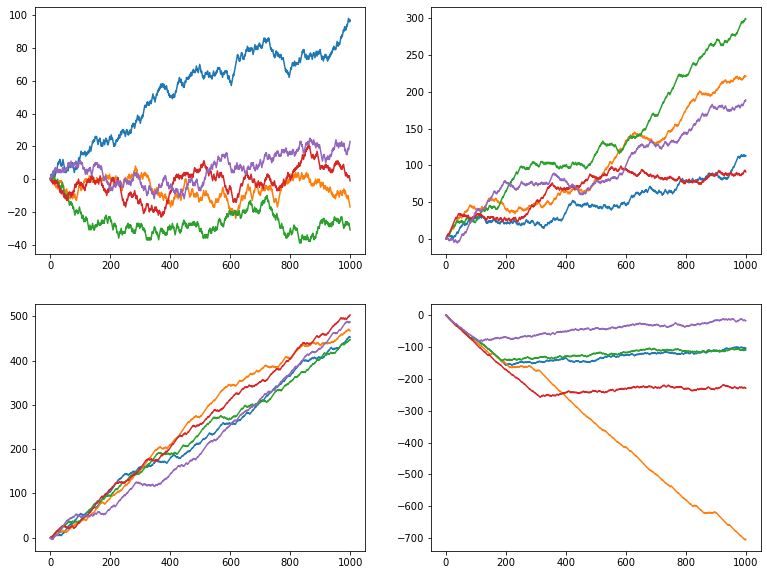

In [8]:
N = 1000
values = ((0.5, 0.5), (0.75, 0.5), (0.8, 0.6), (0.1, 0.55))

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(13,10))
x = np.arange(1000)

for i in range(4):
    p, q = values[i]
    for _ in range(5):
        ax[i//2][i%2].plot(x, excitedRW(p, q, N))



**S3.** Mesurez le temps d'exécution de `excitedRW(0.6, 0.4, 10000)`. Si nécessaire, optimisez votre code pour obtenir un temps d'exécution inférieur à 50ms.

In [11]:
%timeit excitedRW(0.6, 0.4, 10000)

11.9 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**S4.** On considère la marche avec les paramètres $p = 0.9$ et $q=0.49$

- Afficher un graphique $\mathbb{E}[X_n]$ pour $n$ variant de $1$ à $10000$, obtenu par Monte-Carlo en réalisant $500$ simulations de la marche. 

- Que conjecturez-vous pour $\lim_{n\to\infty} \mathbb{E}[X_n]$ ? 

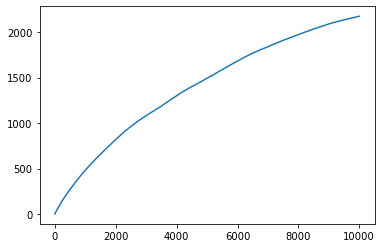

In [12]:
p, q = 0.9, 0.49
N = 1 + 10000
simulations = 500

esperance = np.zeros(N)
for _ in range(simulations):
    esperance += excitedRW(p,q,N)/simulations

plt.plot(np.arange(1,N), esperance[1:]);

**S5.** Refaire la même simulation que dans la question précédente mais en allant maintenant jusqu'à $n= 400000$ au lieu de $n = 10000$. Qu'en pensez-vous ? 

**Remarque** Si votre implémentation est correcte, vous devriez pouvoir réaliser la simulation en moins de 5 minutes. Bravo si vous arrivez à la faire tourner en moins d'une minute !

19.1 s ± 395 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


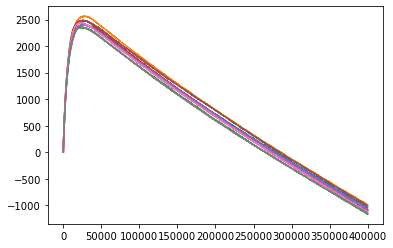

In [13]:
p, q = 0.9, 0.49
N = 1 + 400000
simulations = 500

def xablau():
    X = np.zeros((N, simulations), dtype='int32')
    xi = npr.choice([-1,1], (N,simulations), p=[1-p, p])
    psi = npr.choice([-1,1], (N, simulations), p=[1-q, q])

    index_list = np.arange(simulations)
    valeurs = np.zeros((2*N+1, simulations), dtype='int32')
    valeurs[N+1, :] += 1
    for n in range(1,N):
        disjunction = valeurs[N+1 + X[n-1, :], index_list]
        X[n, :] = X[n-1, :] + xi[n,:]*(disjunction<=2) + psi[n,:]*(disjunction>2)
        valeurs[N+1 + X[n, :], index_list] += 1 

    esperance = np.mean(X, axis=1)

    plt.plot(np.arange(1,N), esperance[1:]);
    
%timeit xablau()

### Epilogue

On peut montrer que si $q < 0.5$, alors $\lim_{n\to\infty} X_n = -\infty$ p.s.  pour toute valeur de $p$ (et aussi en espérance). Par symétrie quand $q > 0.5$, la marche diverge vers $+\infty$ p.s. pour toute valeur de $p$. 

Le cas le plus intéressant est $q = 0.5$. Alors, il y a une transition de phase en fonction de la valeur de $p$: 

- Si $p < 0.25$, alors $\lim_{n\to\infty} X_n = -\infty$ p.s. 
- Si $p > 0.75$, alors $\lim_{n\to\infty} X_n = +\infty$ p.s.
- Si $0.25 \leq p \leq 0.75$, alors $X$ est récurrente: $\limsup X_n = +\infty$ et $\liminf X_n = -\infty$ p.s. 

De plus, dans les trois cas précédents, on a $\lim_{n\to\infty} \frac{X_n}{n} = 0$ p.s. (même transient, le processus demeure sous-balistique). 

Par contre, les différents régimes pour $q=0.5$ ne sont pas facile identifier par simulations, essayez donc, c'est un très bon exercice ! 

**Référence**

M. Zerner. *Multi-excited random walks on integers* (Probability Theory and related fields, 2004)

***
# FIN DU NOTEBOOK